## Homework :02
## K.Surya Prakash 
## Roll.: ee18btech11026

In [2]:
# imports here!

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cmath
PI = np.pi                                  #### IMPORTANT : initialising PI as np.pi
exp = np.e                                  #### IMPORTANT : initialising exp as np.e

###  Class to plot images 

In [15]:
class image:                                             ## class for an image .. provides histogram, thresholding
    def __init__(self,path = None,img = None,plot = False,title = None):
        if(path!=None):
            self.img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        else :
            self.img = img
        self.h,self.w = np.shape(self.img)
        
        if(plot == 1):
            plt.title(title)
            plt.imshow(self.img,cmap = 'gray')
            plt.plot()
            plt.figure()
            

## Prob. 01 DFT Operations
### 1.1 DFT by first principle.

Strategy :  A basic iterative approach has been followed abiding the formula discussed in class

###  1.1 Code

In [17]:
## DFT by first principle...
### CLASS CONTAINING OPERATIONS OF DFT IMPLEMENTED THROUGH FIRST PRINCIPLE


class DFT_operations_by_first_principle:
    def __init__(self):
        pass
    

    def DFT(self,I):
        
        N = I.shape[0]
        DFT = np.zeros((N,N),dtype = complex)

        for u in range(N):
            for v in range(N) : 
                ans = complex(0,0)

                for i in range(N):
                    for j in range(N):

                        phase = -1*(2*PI)*(u*i + v*j)/N
                        ans += I[i][j] * (cmath.rect(1,phase))
                DFT[u][v] = ans
        return DFT
            
            
    def IDFT(self,I):
       
        N = I.shape[0]
        IDFT = np.zeros((N,N),dtype = complex)

        for i in range(N):
            for j in range(N):
                ans = complex(0,0)

                for u in range(N):
                    for v in range(N):
                        phase = (2*PI)*(u*i + v*j)/N
                        ans += I[u][v] * (cmath.rect(1,phase)) * (1/(N)**2)

                IDFT[i][j] = ans
        idft = np.round(abs(IDFT)) 
        final_img = np.array(idft,dtype = np.uint8)
        return final_img    

###   1.1  Implementation of DFT through first principle.
A small demonstration involving synthesizing an image(28*28)
image url: https://www.kaggle.com/scolianni/mnistasjpg?

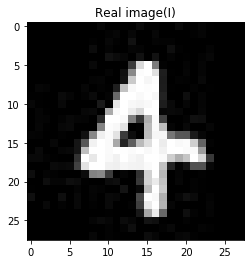

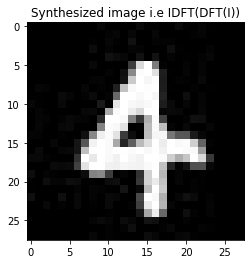

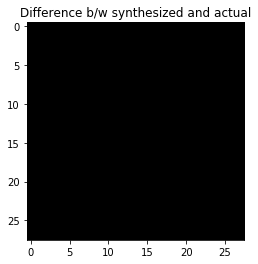

<Figure size 432x288 with 0 Axes>

In [18]:


img = image(path = 'mnist.jpg',plot = True,title  = 'Real image(I)')
I=  img.img                                                         # transforming to a array
N = img.h                                                           # considering square image

Method = DFT_operations_by_first_principle()
analysis  = Method.DFT(I)
synthesis = Method.IDFT(analysis)
image(img = synthesis,plot = True,title = 'Synthesized image i.e IDFT(DFT(I))')
image(img = synthesis - I,plot = True, title = 'Difference b/w synthesized and actual')

###  1.2 DFT operations using matrix operations

### Code

In [19]:
### By matrix product...

### CLASS CONTAINING DFT OPERATIONS IMPLEMENTED USING MATRIX MULTIPLICATION

class DFT_operations_by_matrix:
    def __init__(self):
        pass
    
              
    def DFT(self,I):
        N = I.shape[0]
        phase = -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix

        return W@I@W                                   ### DFT = W*I*W

    def IDFT(self,I):

        N = I.shape[0]                                # considering square image
        phase = -1*(2*PI)/N
        w = cmath.rect(1,phase)
        W = np.array([[ w**(i*j) for j in range(N)]for i in range(N)] ,dtype = complex) # Complex exponential matrix
        W_inv = (1/N) * np.conjugate(W) 

        inverse =  W_inv@I@W_inv                    ### W_inv = 1/N * conjugate of W
        inverse =  np.round(abs(inverse))
        final_img = np.array(inverse,dtype = np.uint8)### IDFT = W_inv* I * W_inv
        return final_img

###  1. Operations using DFT (Visualisation, reconstrucion)

### Code for all operations

In [20]:
def centered_DFT(I):
    J = np.array([[  ((-1)**(i+j)) * I[i][j]  for j in range(I.shape[1])] for i in range(I.shape[0])])
    Method = DFT_operations_by_matrix()
    
    return Method.DFT(J)

class DFT_Visualisation : 
    def __init__(self, dft = None):
        self.dft = dft
        

    def FSCS(self,I):
        mini = np.amin(I)
        maxi = np.amax(I)
        Ans = np.array( [[ (( (I[i][j] - mini)/ (maxi - mini) ) *255) for j in range(I.shape[1]) ] for i in range(I.shape[0])]  ,dtype = np.uint8)
        return Ans
        
    def log_compressed(self,I):
        J = np.log2(1+I)
        return self.FSCS(J)

        
    def magnitude(self,plot = False,title = None):   ### Involves log scale compression
        mag = np.abs(self.dft)
        log_scaled = self.log_compressed(mag)
        
        if(plot == True):
            plt.title(title)
            plt.imshow(log_scaled,cmap = 'gray')
            plt.figure()
        
        return mag
        
    def phase(self,plot = False,title= None):       ### involves FSCS 
        pha = np.angle(self.dft,deg=False)
        scaled_pha = self.FSCS(pha)
        if(plot == True):
            plt.title(title)
            plt.imshow(scaled_pha,cmap = 'gray')
            plt.figure()
            
        return pha
    
    def dft_from_mag_and_phase(self,mag,phase):
        N = mag.shape[0]
        dft = np.array( [[ cmath.rect(mag[i][j],phase[i][j]) for j in range(N)] for i in range(N)] ,dtype = complex)
        return dft
        
        
        
        
        
        

###  Implementation of operations
### Note : The DFT obtained through matrix multiplications are used for the following  demonstrations

#### The same can be done using DFT from first principle , but it takes a lot of computation.
#### To do it , replace "Method  = DFT_operations_by_first_principle". rest is the same

###  a) Displaying Magnitude , Phase (plotted after Scaling)

#### The magntiude plot , log scale compression folowed by FSCS 
#### For phase plot FSCS is done i.e; [-180,180]---> [0,256]

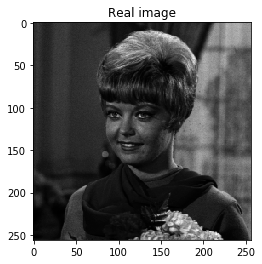

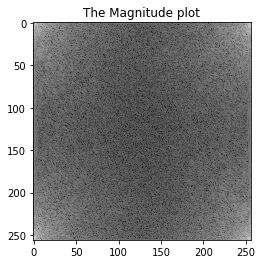

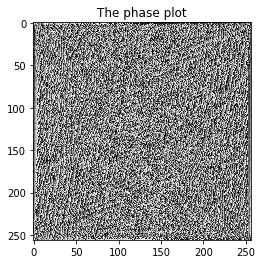

<Figure size 432x288 with 0 Axes>

In [21]:
img = image(path = 'misc/4.1.01.tiff',plot = True, title = 'Real image')
I=  img.img  # transforming to a array


Method = DFT_operations_by_matrix()      ## Method of implemtation
analysis = Method.DFT(I)
synthesis = Method.IDFT(analysis)
image(img = synthesis,plot= False,title = 'Synthesized image from DFT')
image(img = synthesis - I,plot = False, title = 'Difference b/w synthesized and actual')

O = DFT_Visualisation(dft = analysis)
MAG = O.magnitude(plot = True,title = "The Magnitude plot")
PHASE = O.phase(plot = True, title = "The phase plot")

### b) Generating a centered DFT
Observations : We can see that the DC component, i.e the 0th frequency is centered 

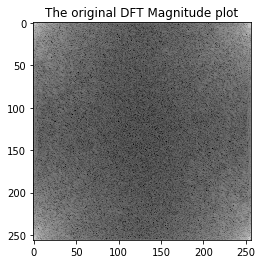

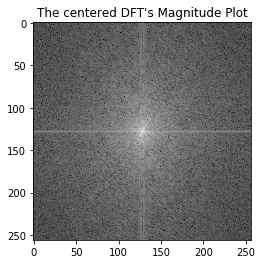

<Figure size 432x288 with 0 Axes>

In [22]:
O = DFT_Visualisation(dft = analysis)
MAG = O.magnitude(plot = True,title = "The original DFT Magnitude plot")

centered = centered_DFT(I)
O_C = DFT_Visualisation(dft = centered)
MAG_C = O_C.magnitude(plot = True,title = "The centered DFT's Magnitude Plot")

### c) Verifying that IDFT(DFT[i]) = i
Inorder to demonstrate this we generate a difference image between the real and the synthesized image, which turns out to be completely black , which means that both are the same.

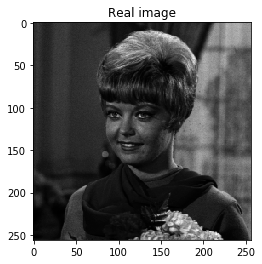

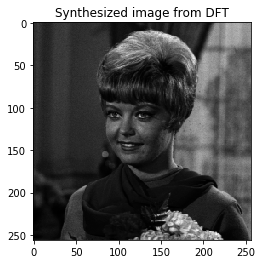

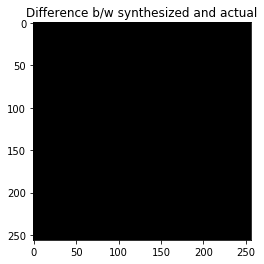

<Figure size 432x288 with 0 Axes>

In [23]:
img = image(path = 'misc/4.1.01.tiff',plot = True, title = 'Real image')
I=  img.img  # transforming to a array


Method = DFT_operations_by_matrix()      ## Method of implemtation
analysis = Method.DFT(I)
synthesis = Method.IDFT(analysis)
image(img = synthesis,plot= True,title = 'Synthesized image from DFT')
image(img = synthesis - I,plot = True, title = 'Difference b/w synthesized and actual')

### d)Demonstrating importance of phase by disturbing the phase part and reconstructing it.
#### a) By transposing the phase matrix
#### b) Setting the phase to 0
#### c) Adding noise.. I added gausian noise with mean 45 and variance 45
Comments :  We can see that changes done in the phase led to a very bad reconstruction , this tells us that phase is a very important component for analysis.

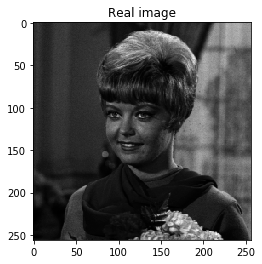

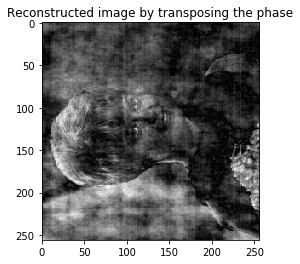

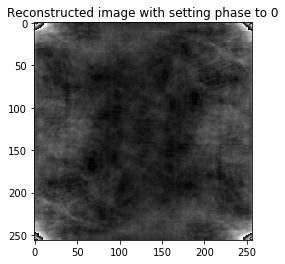

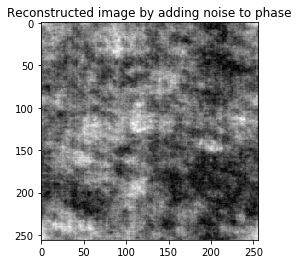

<Figure size 432x288 with 0 Axes>

In [24]:
img = image(path = 'misc/4.1.01.tiff',plot = True, title = 'Real image')
I=  img.img  # transforming to a array

Method = DFT_operations_by_matrix()      ## Method of implemtation
analysis = Method.DFT(I)

O = DFT_Visualisation(dft = analysis)
MAG = O.magnitude(plot = False)
PHASE = O.phase(plot = False)

########################################
#### a) By transposing the phase
########################################

P_disturbed = np.transpose(PHASE)

Visualisation = DFT_Visualisation()
reconstructed_dft = Visualisation.dft_from_mag_and_phase(mag = MAG,phase = P_disturbed)

M = DFT_operations_by_matrix()  
synthesis = M.IDFT(reconstructed_dft)
image(img = synthesis,plot= True,title = 'Reconstructed image by transposing the phase')


########################################
#### b) By setting the phase to 0
########################################

P_disturbed = np.zeros((PHASE.shape))

Visualisation = DFT_Visualisation()
reconstructed_dft = Visualisation.dft_from_mag_and_phase(mag = MAG,phase = P_disturbed)

M = DFT_operations_by_matrix()  
synthesis = M.IDFT(reconstructed_dft)
image(img = synthesis,plot= True,title = 'Reconstructed image with setting phase to 0')

########################################
#### c) By adding noise Gaussian noise here
########################################

P_disturbed = PHASE + np.random.normal( 45, 45, size =PHASE.shape )

Visualisation = DFT_Visualisation()
reconstructed_dft = Visualisation.dft_from_mag_and_phase(mag = MAG,phase = P_disturbed)

M = DFT_operations_by_matrix()  
synthesis = M.IDFT(reconstructed_dft)
image(img = synthesis,plot= True,title = 'Reconstructed image by adding noise to phase')

# Question 2 

## Entire code for various operations asked in the question

In [25]:
#################################################
###### Code for 2.1
#################################################


def circular_conv_interative(I,F):
    J = np.zeros((I.shape))
    M = J.shape[0]
    N = J.shape[1]
    for i in range(J.shape[0]):
        for j in range(J.shape[1]):
            temp = 0
            for p in range(F.shape[0]):
                for q in range(F.shape[1]):
                    temp+= I[(i-p)%M][(j-q)%N] * F[p][q]
            J[i][j] = np.round(temp)
    return J


def zero_padding(I,target_shape,position = None):   ### The position tells about the padding scheme.
    J = np.zeros(target_shape)
    
    if(position == 'tl' or position == None):
        J[0:I.shape[0],0:I.shape[1]] = I[0:I.shape[0],0:I.shape[1]]
    elif (position == 'br'):
        J[(target_shape[0]) - I.shape[0]:target_shape[0],target_shape[1] - I.shape[1]:target_shape[1]] = I
    return J

                    
def circular_conv_by_DFT(I,F):              #### If the filter is less size , we will zero pad it to make sure we have same dimensions.
    F = zero_padding(F,I.shape)
    Method = DFT_operations_by_matrix() 
    I_dft = Method.DFT(I)
    F_dft = Method.DFT(F)
    
    J = np.multiply(I_dft,F_dft,dtype = complex)
    
    convolved = Method.IDFT(J)
    return convolved

#################################################
###### Code for 2.2
#################################################


################## LINEAR CONVOLUTION.
def linear_convolution(I,F):
    padded = zero_padding(I,(I.shape[0]+F.shape[0] - 1 ,I.shape[0]+F.shape[0] - 1))
    total = circular_conv_interative(padded,F)
    cropped = total[0:I.shape[0],0:I.shape[1]]
    return total,cropped

#################################################
###### Code for 2.3
#################################################

def linear_conv_DFT(I,F):
    N,M = I.shape
    P,P = F.shape
    #F = zero_padding(F,I.shape)    ### First make sure both image and filter are of same size
    
    I = zero_padding(I,(N+P-1,M+P-1))
    F = zero_padding(F,(N+P-1,M+P-1))
    
    Method = DFT_operations_by_matrix() 
    I_dft = Method.DFT(I)
    F_dft = Method.DFT(F)
    
    J = np.multiply(I_dft,F_dft,dtype = complex)
    
    total = Method.IDFT(J)
    cropped = total[0:N,0:M]    ### Cropping the tl image.

    return total,cropped
    
    
    
    

### 2.1 Circular convolution (implemented in a iterative form using formula discussed)

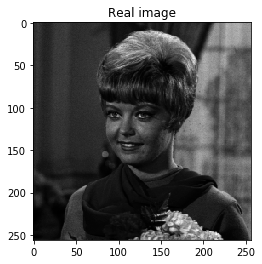

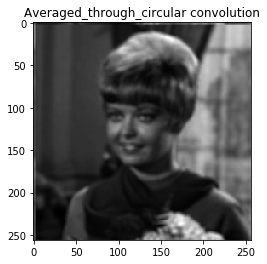

<Figure size 432x288 with 0 Axes>

In [26]:
img = image(path = 'misc/4.1.01.tiff',plot = True,title  = 'Real image')
I=  img.img  # transforming to a array

f = 5                         # dimension of filter
F = np.ones((f,f))/ (f*f)       # Average filter...

### IMPLENTING CIRCULAR CONV THROUGH ITERATION...

Averaged_iter = circular_conv_interative(I,F)
image(img = Averaged_iter,plot = True,title  = 'Averaged_through_circular convolution')

## 2.2 Obtaining linear convoluted image from the circular convolution implementation.
### Comments :  We can see in the cropped output a black line at the top and left border , this is due to the zero padding done to avoid taking the values of the before image , which arises due to periodicity of the image in circular convolution.

#### Note : I ve not padded the image to 2*N,2*N rather to (N+P-1,N+P-1) to reduce the space usage and for faster computation.

### Strategy : 

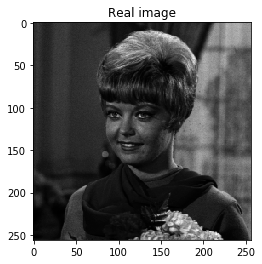

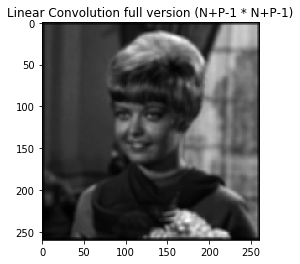

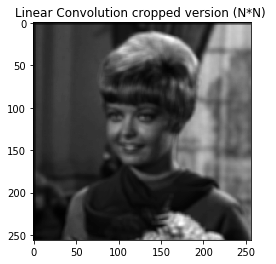

<Figure size 432x288 with 0 Axes>

In [30]:
img = image(path = 'misc/4.1.01.tiff',plot = True,title  = 'Real image')
I=  img.img  # transforming to a array

f = 5                         # dimension of filter
F = np.ones((f,f))/ (f*f)       # Average filter...

Average_full, Average_cropped = linear_convolution(I,F)
image(img = Average_full,plot = True,title  = 'Linear Convolution full version (N+P-1 * N+P-1)')
image(img = Average_cropped,plot = True,title  = 'Linear Convolution cropped version (N*N) ')

##  2.3 Obtaining Linear convolution using DFT of padded images.
### Strategy :

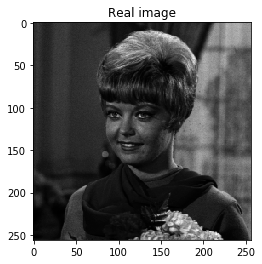

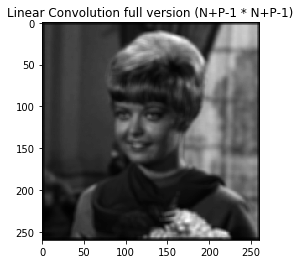

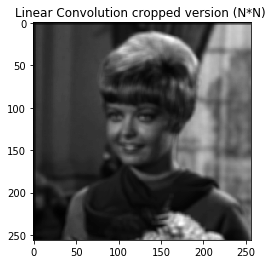

<Figure size 432x288 with 0 Axes>

In [28]:
#### Linear Convolution using DFT operations.

img = image(path = 'misc/4.1.01.tiff',plot = True,title  = 'Real image')
I=  img.img  # transforming to a array

f = 5                         # dimension of filter
F = np.ones((f,f))/ (f*f)       # Average filter...

LDFT_full, LDFT_cropped = linear_conv_DFT(I,F)
image(img = LDFT_full,plot = True,title  = 'Linear Convolution full version (N+P-1 * N+P-1)')
image(img = LDFT_cropped,plot = True,title  = 'Linear Convolution cropped version (N*N) ')

### Checking that 2.2 and 2.3 yield the same output:
#### I am plotting the difference image  = I_(linear conv. using circ. conv) - I_(linear_conv usinf DFT)
This results in a black image denoting that both results are the same.


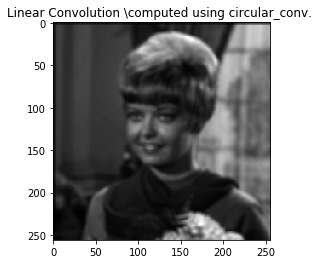

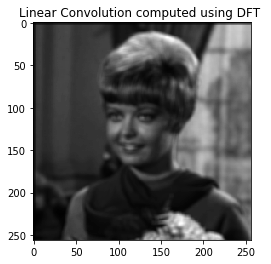

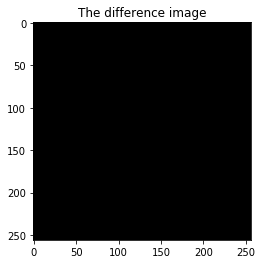

<Figure size 432x288 with 0 Axes>

In [31]:
image(img = Average_cropped,plot = True,title  = 'Linear Convolution \computed using circular_conv. ') # Circular convoluted
image(img = LDFT_cropped,plot = True,title  = 'Linear Convolution computed using DFT ') # Done using DFT

difference = Average_cropped - LDFT_cropped
image(img = difference, plot = True, title = 'The difference image')

# Problem 03
## The DFT magnitude plots are centered DFT's

### SETUP : An AWGN is added to the image with mean 0 and variance 25

### Code for the whole question is as follows : 

In [17]:
### Adding noise

###################################################
####### SETUP
###################################################

def noise(I, mean, var):
    sigma = var**0.5
    return np.random.normal(mean,sigma,I.shape)


###################################################
####### MOVING AVERAGE FILTER OF SIZE M*M               ### Directly plots the filtered image
###################################################


def MVA_filtering(I,M,plot_dft = False):                         #  M : dimension of filter
    F = np.ones((M,M))/ (M*M)                 # Average filter...`
    _, LDFT_cropped = linear_conv_DFT(I,F)
    image(img = LDFT_cropped, plot = True, title = 'Filtered_image , with M = %d'%M)
    
    if (plot_dft == True):
        J_DFT = centered_DFT(LDFT_cropped)
        J_C = DFT_Visualisation(dft = J_DFT)
        MAG_J_C = J_C.magnitude(plot = True, title  = "Magnitude Plot of Filtered image with M = %d" %M)
        


###################################################
####### GAUSSIAN FILTER OF SIZE M*M AND STD 'sigma'             ### Directly plots the filtered image
###################################################
def gaussian_filtering(I,M,std,plot_dft = False):  
    
    F = np.zeros((M,M))
    a = 1/(2*PI*((std)**2))
    for i in range(M):
        for j in range(M):
            F[i][j] = a* ( exp**(-1* ( (i**2 + j**2)/ (2*(std**2)) )  ) )
    
    _, cropped = linear_convolution(I,F)
    image(img = cropped, plot = True, title = 'Filtered_image , with M = %d and Std = %.2f '%(M,std))
    
    
    if (plot_dft == True):
        J_DFT = centered_DFT(cropped)
        J_C = DFT_Visualisation(dft = J_DFT)
        MAG_J_C = J_C.magnitude(plot = True, title  = "Magnitude Plot of Filtered image  M = %d and Std = %.2f "%(M,std))
    
    
    

### Setup implementation : I added a AWGN noise to the image and plotted its DFT, we can see that the noise added a plain image in the magnitude spectrum

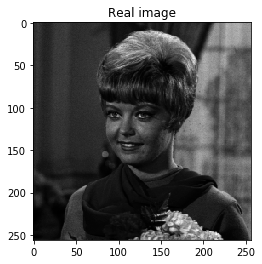

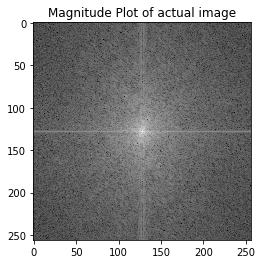

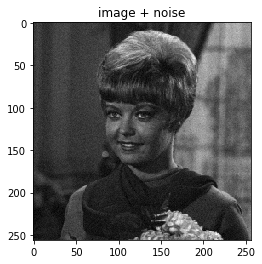

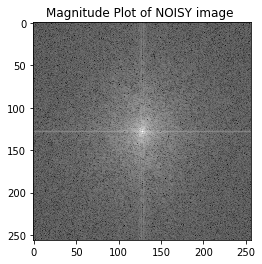

<Figure size 432x288 with 0 Axes>

In [156]:
img = image(path = 'misc/4.1.01.tiff',plot = True,title  = 'Real image')


I=  img.img  # transforming to a array
I_DFT = centered_DFT(I)                                   ### Visualising the DFT of image
I_C = DFT_Visualisation(dft = I_DFT)
MAG_I_C = I_C.magnitude(plot = True,title = "Magnitude Plot of actual image")


NOISE = noise(I,0,25)
J = I + NOISE
image(img = J,plot = True,title  = 'image + noise')

J_DFT = centered_DFT(J)
J_C = DFT_Visualisation(dft = J_DFT)                    ### Visualising the DFT of noisy image
MAG_J_C = J_C.magnitude(plot = True, title  = "Magnitude Plot of NOISY image ")

### 3.1 Implementing MVA filter of various size


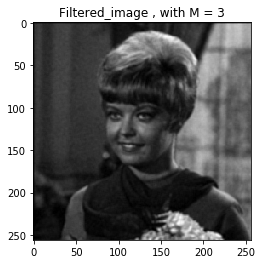

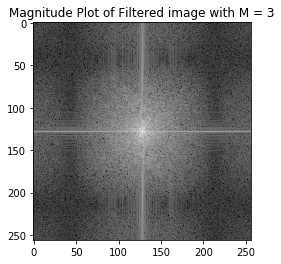

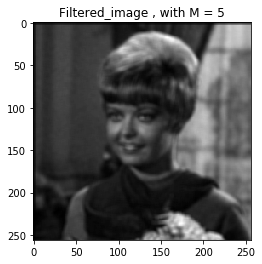

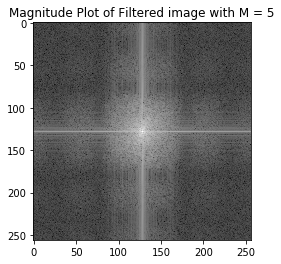

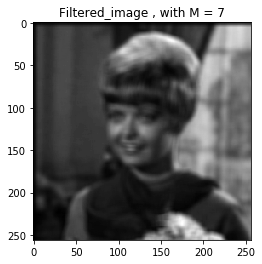

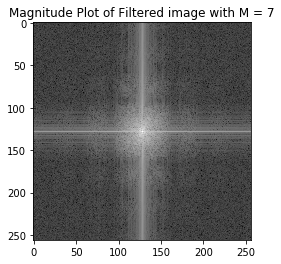

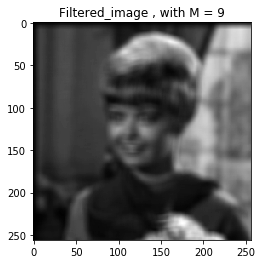

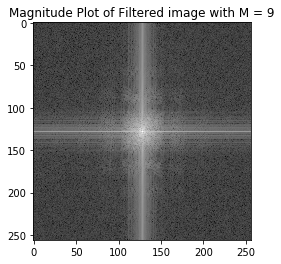

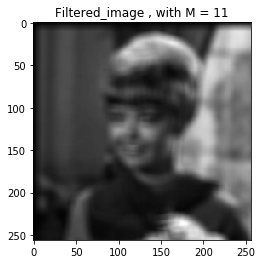

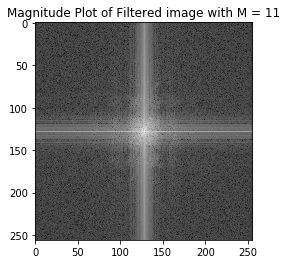

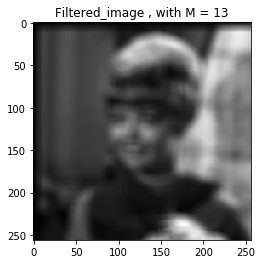

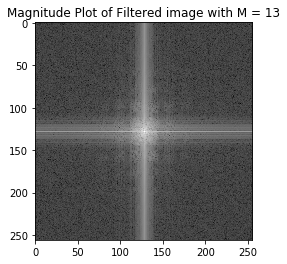

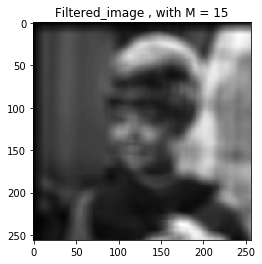

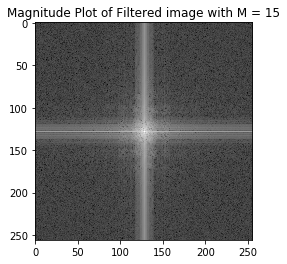

<Figure size 432x288 with 0 Axes>

In [157]:
for i in range(3,15+1,2):
    MVA_filtering(J,i,plot_dft = True)     ### plot_dft == plots the magnitude plot of the denoised image

### 3.2 Implementing Gaussian filter with size 5*5 and varied variance.

/home/surya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/surya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


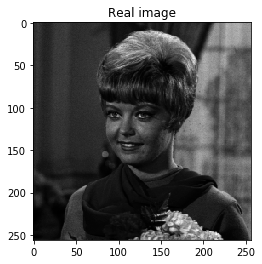

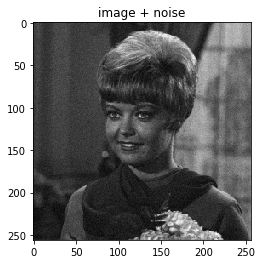

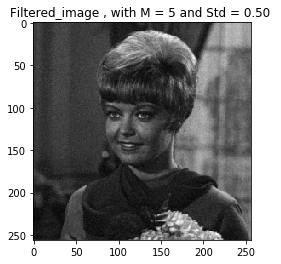

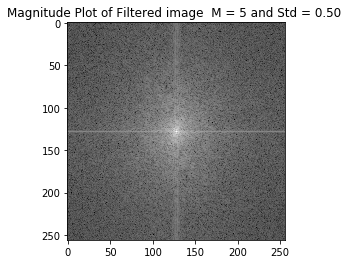

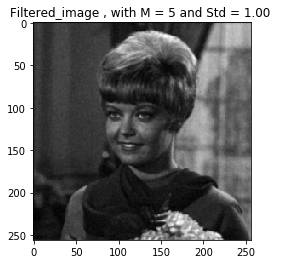

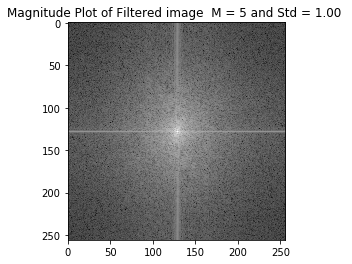

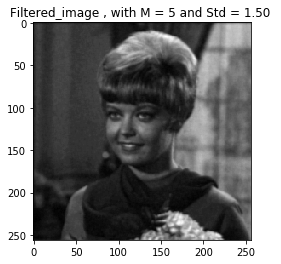

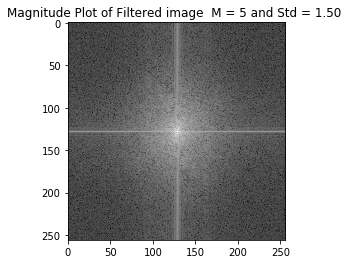

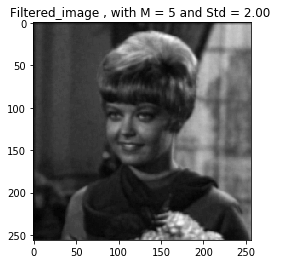

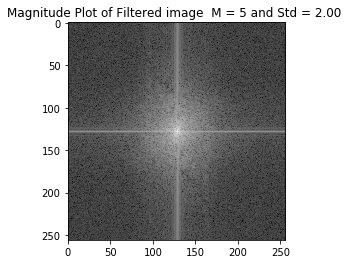

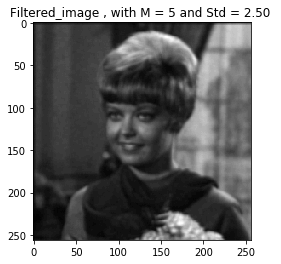

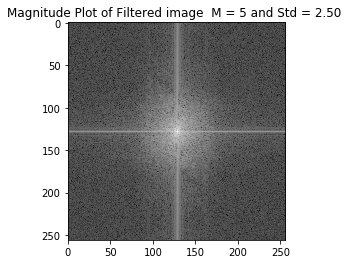

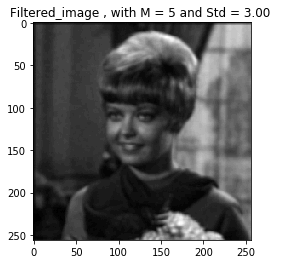

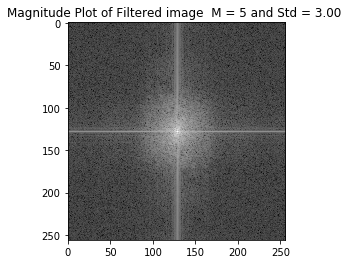

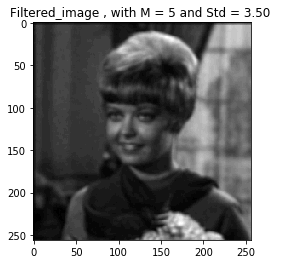

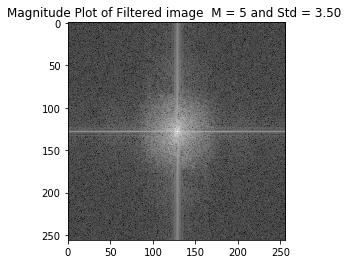

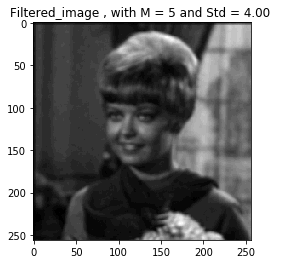

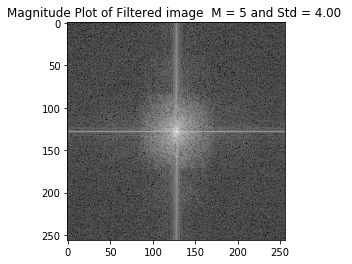

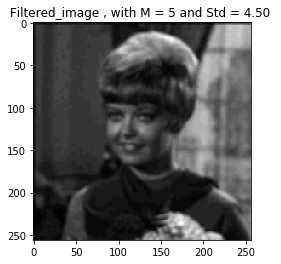

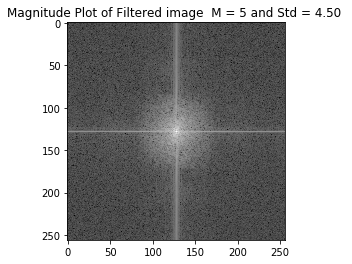

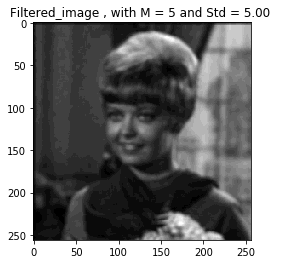

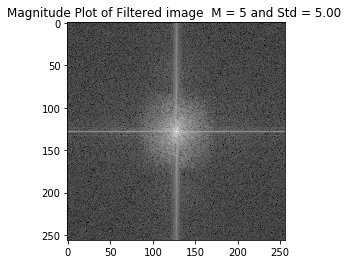

<Figure size 432x288 with 0 Axes>

In [159]:
img = image(path = 'misc/4.1.01.tiff',plot = True,title  = 'Real image')
I=  img.img  # transforming to a array
NOISE = noise(I,0,25)
J = I + NOISE
image(img = J,plot = True,title = 'image + noise')

M = 5
STD = np.linspace(0.5,5.0,10)

for std in STD:
    gaussian_filtering(J,M,std,plot_dft = True)     ### plot_dft == plots the magnitude plot of the denoised image
    

In [46]:
M = 5
std = 1
c = -2*(PI**2)*(std**2)



img = image(path = 'misc/4.1.01.tiff',plot = False,title  = 'Real image')
I=  img.img  # transforming to a array
NOISE = noise(I,0,25)
J = I + NOISE

N = J.shape[0]

H_dft = np.zeros((N,N), complex)
for u in range(M):
    for v in range(M):
        H_dft[u+M-1][v+M-1] = np.exp(c * (u**2 + v**2)/ (M**2))
        
        
#####################################################


        
Method = DFT_operations_by_matrix()      ## Method of implemtation
H = Method.IDFT(H_dft)
print(np.amax(H))

0


In [9]:
c = -2*(PI**2)*(std**2)
print(np.exp(c))

2.675287991074243e-09


## THE END !!